In [1]:
using Graphs, Graphs.Experimental.ShortestPaths
using GraphIO
using GraphIO.NET
using Statistics
using DataFrames
using Random
using Distributions
using Plots, GraphRecipes

In [2]:
function erdos_renyi(n::Int,k::Int)
    g = SimpleGraph(n)
    if k < 0
        k = 0
        println("The value of K must be greater to or equal than 0. Using K=0.")
    elseif k > (n*(n-1))/2
        k = Integer((n*(n-1))/2)
        println("The value of K must be equal to or lower than $k. Using K=$k.")
    end
    
    connections = Dict(i => Vector{Int}() for i in 1:n)
    connected = 0
        
    while connected < k 
        r1 = rand(1:10)
        r2 = rand(1:10)
            
        if r1 != r2 && !(r1 in connections[r2]) && !(r2 in connections[r1])
            add_edge!(g, r1, r2)
            append!( connections[r1], r2 )
            append!( connections[r2], r1 )
            connected += 1
        end
    end
    return g
end



erdos_renyi (generic function with 1 method)

In [ ]:
erg = erdos_renyi(100,450)
print(collect(edges(erg)))
graphplot(erg, curves=false)

In [15]:
function erdos_renyi(n::Int,p::Float64, p_v=1::Int)
    g = SimpleGraph(n)
    if p <= 0.0
        println("The value of K must be between 0 and 1. Using p=$p.")
        return g
    elseif p > 1.0
        p = 1.0
        println("The value of K must be between 0 and 1. Using p=$p.")
    end
    if p_v == 1 
        for i in 1:n
            for j in i+1:n
                r = rand()
                if r <= p
                    add_edge!(g, i, j)
                end
            end
        end
        return g
    else
        binomialDistribution = Binomial(n*(n-1)/2,p)
        k = Integer(rand(binomialDistribution, 1)[1])
        print
        return erdos_renyi(n,k)
    end
    
end

erdos_renyi (generic function with 3 methods)

In [ ]:
erg = erdos_renyi(20,0.4)
print(ne(erg))
graphplot(erg, curves=false)

45

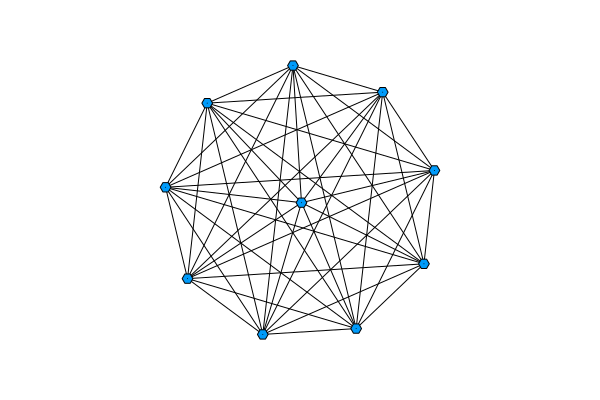

In [6]:
erg = erdos_renyi(10,1.0, 2)
print(ne(erg))
graphplot(erg, curves=false)

In [7]:
function barabasi_albert(m_0::Int, N::Int, m::Int, init = 0.4::Any)
    m <= m_0 <= N ? nothing : throw(AssertionError("Parameter values must satisfy the following rule: m <= m_0 <= N")) 
    if init <= 1.0 && init isa AbstractFloat
        g = erdos_renyi(m_0, init)
    else
        g = path_graph(m_0)
#         g = SimpleGraph(10)
#         for i in 1:(nv(g)-1)
#             add_edge!(g, i, i+1)
#         end
#         graphplot(g, curves=false)
    end
    
    for i in m_0+1:N
        if add_vertex!(g)
            degrees = degree(g)
            total_degree = sum(degrees)  
            probabilities = degrees / total_degree  
            distribution = Categorical(probabilities)
            sampled_vertices = rand(distribution, m)
            
            for j in sampled_vertices
                add_edge!(g, i, j)
            end
        end
    end
    return g
end

barabasi_albert (generic function with 2 methods)

38

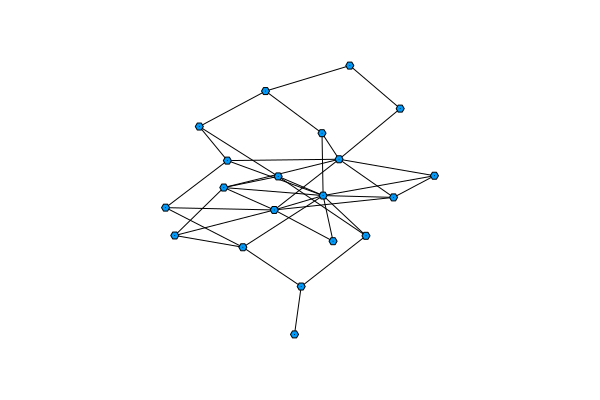

In [8]:
erg = barabasi_albert(10,20,3,1)
print(ne(erg))
graphplot(erg, curves=false)

49

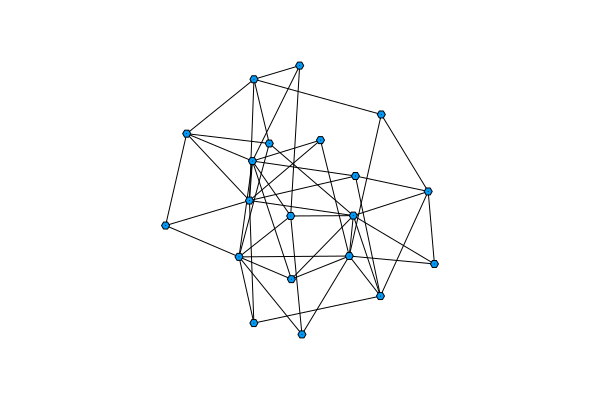

In [23]:
erg = barabasi_albert(10,20,3,0.4)
print(ne(erg))
graphplot(erg, curves=false)

Precompiling GraphRecipes
  ✓ GraphRecipes
  1 dependency successfully precompiled in 4 seconds. 76 already precompiled.


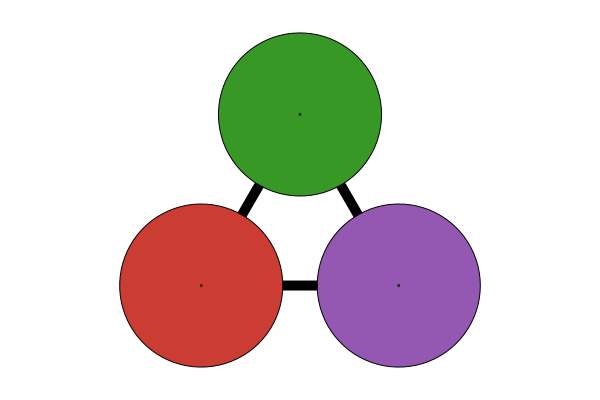

In [1]:
using GraphRecipes
using Plots

g = [0 1 1;
     1 0 1;
     1 1 0]

graphplot(g,
          x=[0,-1/tan(π/3),1/tan(π/3)], y=[1,0,0],
          nodeshape=:circle, nodesize=1.1,
          axis_buffer=0.6,
          curves=false,
          color=:black,
          nodecolor=[colorant"#389826",colorant"#CB3C33",colorant"#9558B2"],
          linewidth=10)

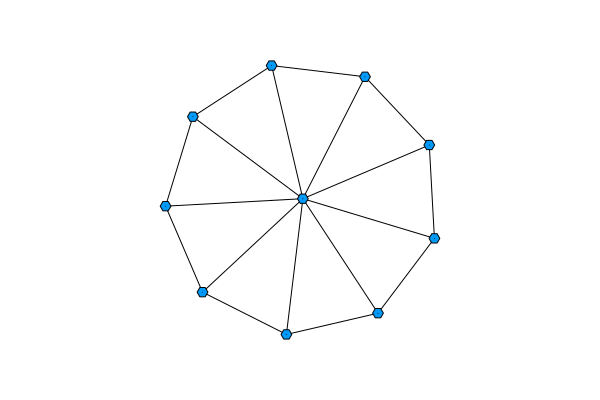

In [4]:
using Plots, GraphRecipes
g = wheel_graph(10)
graphplot(g, curves=false)

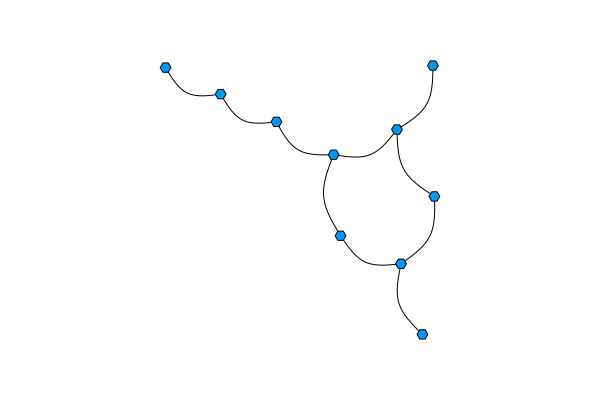

In [124]:
using Plots, GraphRecipes
g = SimpleGraph(10,10)
graphplot(g, curves=true)

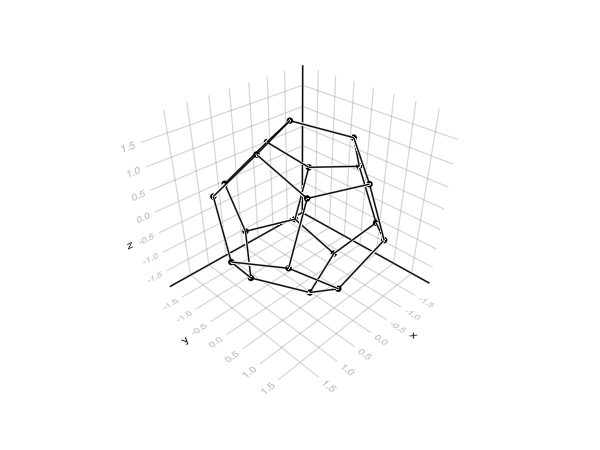

In [11]:
using GLMakie, GraphMakie
using GraphMakie.NetworkLayout

g = smallgraph(:dodecahedral)
graphplot(g; layout=Stress(; dim=3))

In [15]:
using GLMakie, SGtSNEpi, SNAPDatasets

GLMakie.activate!()

g = loadsnap(:as_caida)
y = sgtsnepi(g);
show_embedding(y;
  A = adjacency_matrix(g),        # show edges on embedding
  mrk_size = 1,                   # control node sizes
  lwd_in = 0.01, lwd_out = 0.001, # control edge widths
  edge_alpha = 0.03 )             # control edge transparency

LoadError: ArgumentError: Package SNAPDatasets not found in current path.
- Run `import Pkg; Pkg.add("SNAPDatasets")` to install the SNAPDatasets package.